In [29]:
#A função sazonalidade para calcular o vetor "r" e os valores de x e y para serem plotados no gráfico
def sazonalidade(file_location):
    
    #Função„que calcula o valor do ângulo theta de cada ano de uma estação
    def theta(file_location):
        import pandas as pd
        import numpy as np
        file_location = "/Users/anacarolinacalderaro/Desktop/trabalho/DADOS/72430000_julian.xlsx"
        
        #Carregando a planilha excel
        xl = pd.ExcelFile(file_location)
        
        #Transformando a planilha em um dataframe
        df1 = xl.parse('Plan1')
        df1.rename(columns={" Year": "year"}, inplace=True)
        
        #Selecionando a coluna anos
        anos = [df1.loc[:]["year"]]

        #Transformando uma data em dia Juliano
        import datetime as dt
        data_flood = [df1.loc[:]['DATE_ACCESS']]
        jd = [ts.dt.dayofyear for ts in data_flood]
        anos_bis = [ts.dt.is_leap_year for ts in data_flood]
        
        #Calculando o ângulo theta
        angulo_theta = np.empty(shape=np.shape(jd))
        for j in range(0,len(angulo_theta[0][:]-1)):
            if anos_bis[0][j]==True:
                angulo_theta[0][j] = jd[0][j]*2*np.pi/366
            elif anos_bis[0][j] == False:
                angulo_theta[0][j] = jd[0][j] * 2 * np.pi / 365
        angulo_theta = angulo_theta[0][:]
        return(angulo_theta)

    # Função que calcula o valor de x
    def x (angulo_theta):
        import numpy as np
        import math
        costheta = [math.cos(i) for i in angulo_theta]
        xvalue= sum(costheta)/len(costheta)
        return(xvalue)

    # Função que calcula o valor de y
    def y (angulo_theta):
        import numpy as np
        import math
        sintheta = [math.sin(i) for i in angulo_theta]
        yvalue = sum(sintheta) / len(sintheta)
        return (yvalue)

    #Função que calcula o valor de r com base nos valores de x e y
    def r (x, y):
        import numpy as np
        import math
        rvalue = math.sqrt(x**2+y**2)
        return(rvalue)

    def angtheta(x, y):
        import math
        import numpy as np
        if x > 0 and y > 0:
            t = math.atan(y/x)
        elif x < 0:
            t = math.atan(y/x)+ math.pi
        elif x > 0 and y < 0:
            t = math.atan(y/x) + 2*math.pi
        elif x == 0 and y > 0:
            t = math.pi/2
        elif x == 0 and y < 0:
            t = (3*math.pi)/2
        elif x==0 and y==0:
            t = None
        return(t)
    def mdf(t):
        import math
        import numpy as np
        m = (t*365)/(2*math.pi)
        return(m)
    import numpy as np
    index = np.empty(5)
    index[0] = x(theta(file_location))
    index[1] = y(theta(file_location))
    index[2] = r(index[0], index[1])
    index[3] = angtheta(index[0], index[1])
    index[4] = mdf(index[3])

    #print("Valores [x, y, r, theta, mdf] ", index )
    return([index[0],index[1],index[2],index[3],index[4]])

In [30]:
#função para rodar todos os dados na pasta:
def todosdados(diretorio):
    import os
    import numpy as np
    arqs = os.listdir(diretorio)
    matriz = [] 
    
    for i in arqs:
        file_location = diretorio + i
        resultados = sazonalidade(file_location)
        matriz.append(resultados)
    return(matriz)

In [31]:
#função para plotar os dados:
def plot(matriz):
        import numpy as np
        import matplotlib.pyplot as plt
        m = np.array(matriz)
        
        #dados de entrada para a plotagem, o r e t foram extraídos da matriz gerada pela função todosdados(diretorio)
        r = m[:, 2]
        t = m[:, 3]
        area = 10
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='polar')
        ax.set_xlim((0, 2 * np.pi))
        
        #plotando o gráfico de mês em mês:
        ax.set_xticks(
            [0, ((np.pi) * (1 / 6)), (np.pi * (2 / 6)), (np.pi * (1 / 2)), (np.pi * (2 / 3)), (np.pi * (5 / 6)), np.pi,
             (2 * np.pi * (7 / 12)), \
             (2 * np.pi * (2 / 3)), (2 * np.pi * (3 / 4)), (2 * np.pi * (5 / 6)), (2 * np.pi * (11 / 12)), 2 * np.pi])
        ax.scatter(t, r, c='k', s=area, alpha=1)
        ax.set_title("Índice de Sazonalidade das Cheias no RS", fontsize=17)
        ax.set_xticklabels(
            ['1 Jan', '1 Fev', '1 Mar', '1 Abr', '1 Mai', '1 Jun', '1 Jul', '1 Ago', '1 Set', '1 Out', '1 Nov',
             '1 Dez'])
        ax.set_rmax(1)

        plt.show()

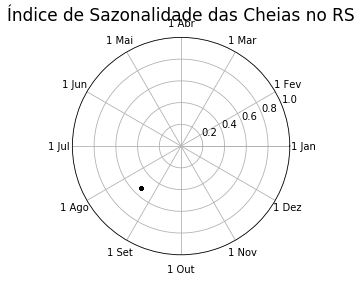

In [32]:
#Localização do diretório onde se encontram os arquivos xlsx
diretorio = "/Users/anacarolinacalderaro/Desktop/trabalho/DADOS/"

#chamada de função que analisa todos os arquivos, essa função„por sua vez chama a sazonalidade()
matriz = todosdados(diretorio) 

#print(matriz)
plot(matriz)